In [1]:
import h5py
import numpy as np
import sys
sys.path.append('..')
from modules.vizhelpercode import viewArbitraryVolume
from modules.configfile import config
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, fixed
%matplotlib inline

In [2]:
def displayMRIandPrediction(mr_im, pr_im, z):
    seq_name = {
        0: 'T1',
        1: 'T2',
        2: 'T1ce',
        3: 'T2flair'
    }

    lab_names = {
                0: 'Necrotic',
                1: 'Edema',
                2: 'Enhancing'
            }

    fig = plt.figure(figsize=(10, 5))
    outer = gridspec.GridSpec(1, 4, wspace=0.2, hspace=0.2)

    c = 0
#     z = 50
#     mr_im = orig_image
#     pr_im = prediction
    for i in range(4):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.1)

        for j in range(2):
            if i == 3 and j == 1:
                ax = plt.Subplot(fig, inner[j])
                ax.imshow(mr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                break

            ax = plt.Subplot(fig, inner[j])

            # plot here
            if j == 0: # this is the top row    
                ax.imshow(mr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                ax.set_title(seq_name[i])
            else:
                ax.imshow(pr_im[i, :,:,z], cmap=plt.cm.Greys_r)
                ax.set_title(lab_names[i])
            ax.set_axis_off()
            fig.add_subplot(ax)

    fig.show()

In [3]:
hdf5 = h5py.File(config['hdf5_filepath_prefix_2017'], 'r')

In [4]:
hf = h5py.File('/local-scratch/cedar-rm/scratch/asa224/model-predictions/BRATS_Validation_Prediction_isensee_main')

In [10]:
which = 35

In [11]:
orig_image = hdf5['original_data']['validation_data'][which]
prediction = hf['validation_data'][which]

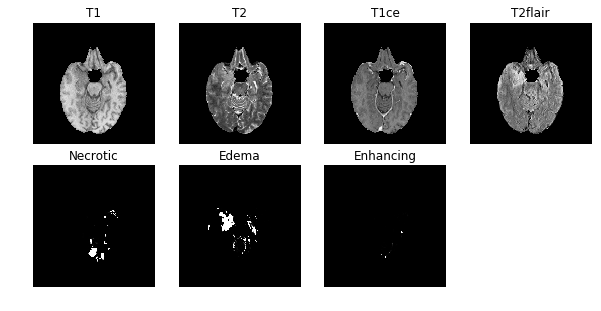

In [12]:
displayMRIandPrediction(orig_image, prediction, 50)

In [13]:
interact(displayMRIandPrediction, mr_im=fixed(orig_image), pr_im=fixed(prediction > 0.1), z=(0, 154))

interactive(children=(IntSlider(value=77, description=u'z', max=154), Output()), _dom_classes=('widget-interact',))

<function __main__.displayMRIandPrediction>